In [22]:
## Importing various libraries

import time
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## sklearn Imports

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Keras Imports

from keras.utils import np_utils 
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Flatten,Dense
from keras.utils.np_utils import to_categorical
from keras.initializers import RandomNormal  #or xaiver/Hae normilization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.callbacks import LearningRateScheduler

In [23]:
# For plotting models

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [24]:
## For plotting confusion maps

def plot_confusion(confusion):

    for i in range(10):
        confusion[i][i] = 0
    
    plt.figure(figsize=(15,10))
    sns.heatmap(confusion,annot=True, linewidth = 1 , cmap="hot")

In [25]:
## Loading MNIST dataset

dataset = mnist
(X_train, Y_train), (X_test, Y_test) = dataset.load_data()

In [26]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


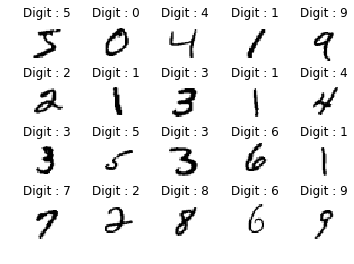

In [27]:
## Peeking at data

for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(X_train[i],cmap='gray_r')
  plt.title("Digit : {}".format(Y_train[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

In [28]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [29]:
# Normalizing the dataset by dividing values by 255 to convert the usual 0 to 256 pixel value to 0 to 1

X_train = X_train/255
X_test = X_test/255

# One-Hot incoding.
# This way numbers will be converted to an array of 0's with one 1 at the index of whatever number it originally was
# E.G.: 3 => [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [30]:
# Sizes

input_dim = X_train.shape[1]
output_dim = 10
batch_size = 128
epochs_num = 30
models_num = 17

## Models tested

## BatchNormalization

In [33]:
model_A = Sequential()

model_A.add(Dense(64, activation='sigmoid', input_shape=(input_dim,)))
model_A.add(BatchNormalization())
model_A.add(Dense(32, activation='sigmoid'))
model_A.add(BatchNormalization())
model_A.add(Dense(10, activation='softmax'))
model_A.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [34]:
model_B = Sequential()

model_B.add(Dense(64, activation='sigmoid', input_shape=(input_dim,)))
model_B.add(BatchNormalization())
model_B.add(Dense(32, activation='sigmoid'))
model_B.add(BatchNormalization())
model_B.add(Dense(10, activation='softmax'))
model_B.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [35]:
model_C = Sequential()

model_C.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_C.add(BatchNormalization())
model_C.add(Dense(32, activation='relu'))
model_C.add(BatchNormalization())
model_C.add(Dense(10, activation='softmax'))
model_C.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [36]:
model_D = Sequential()   

model_D.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_D.add(BatchNormalization())
model_D.add(Dense(32, activation='relu'))
model_D.add(BatchNormalization())
model_D.add(Dense(10, activation='softmax'))
model_D.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

## Dropout

In [37]:
model_E = Sequential()

model_E.add(Dense(64, activation='sigmoid', input_shape=(input_dim,)))
model_E.add(Dropout(0.5))
model_E.add(Dense(32, activation='sigmoid'))
model_E.add(Dropout(0.5))
model_E.add(Dense(10, activation='softmax'))
model_E.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [38]:
model_F = Sequential()

model_F.add(Dense(64, activation='sigmoid', input_shape=(input_dim,)))
model_F.add(Dropout(0.5))
model_F.add(Dense(32, activation='sigmoid'))
model_F.add(Dropout(0.5))
model_F.add(Dense(10, activation='softmax'))
model_F.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [39]:
model_G = Sequential()

model_G.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_G.add(Dropout(0.5))
model_G.add(Dense(32, activation='relu'))
model_G.add(Dropout(0.5))
model_G.add(Dense(10, activation='softmax'))
model_G.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [40]:
model_H = Sequential()   

model_H.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_H.add(Dropout(0.5))
model_H.add(Dense(32, activation='relu'))
model_H.add(Dropout(0.5))
model_H.add(Dense(10, activation='softmax'))
model_H.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

## Both

In [41]:
model_I = Sequential()

model_I.add(Dense(64, activation='sigmoid', input_shape=(input_dim,)))
model_I.add(BatchNormalization())
model_I.add(Dropout(0.5))
model_I.add(Dense(32, activation='sigmoid'))
model_I.add(BatchNormalization())
model_I.add(Dropout(0.5))
model_I.add(Dense(10, activation='softmax'))
model_I.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [42]:
model_J = Sequential()

model_J.add(Dense(64, activation='sigmoid', input_shape=(input_dim,)))
model_J.add(BatchNormalization())
model_J.add(Dropout(0.5))
model_J.add(Dense(32, activation='sigmoid'))
model_J.add(BatchNormalization())
model_J.add(Dropout(0.5))
model_J.add(Dense(10, activation='softmax'))
model_J.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [43]:
model_K = Sequential()

model_K.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_K.add(BatchNormalization())
model_K.add(Dropout(0.5))
model_K.add(Dense(32, activation='relu'))
model_K.add(BatchNormalization())
model_K.add(Dropout(0.5))
model_K.add(Dense(10, activation='softmax'))
model_K.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [44]:
model_L = Sequential()   

model_L.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_L.add(BatchNormalization())
model_L.add(Dropout(0.5))
model_L.add(Dense(32, activation='relu'))
model_L.add(BatchNormalization())
model_L.add(Dropout(0.5))
model_L.add(Dense(10, activation='softmax'))
model_L.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

## None

In [45]:
model_M = Sequential()

model_M.add(Dense(64, activation='sigmoid', input_shape=(input_dim,)))
model_M.add(Dense(32, activation='sigmoid'))
model_M.add(Dense(10, activation='softmax'))
model_M.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [46]:
model_N = Sequential()

model_N.add(Dense(64, activation='sigmoid', input_shape=(input_dim,)))
model_N.add(Dense(32, activation='sigmoid'))
model_N.add(Dense(10, activation='softmax'))
model_N.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [47]:
model_O = Sequential()

model_O.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_O.add(Dense(32, activation='relu'))
model_O.add(Dense(10, activation='softmax'))
model_O.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [48]:
model_P = Sequential()   

model_P.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_P.add(Dense(32, activation='relu'))
model_P.add(Dense(10, activation='softmax'))
model_P.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [49]:
model_Q = Sequential()

model_Q.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_Q.add(Dense(32, activation='sigmoid'))
model_Q.add(Dense(10, activation='softmax'))
model_Q.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [50]:
## Making true results from Y_test back to a string

true_results = np.zeros(X_test.shape[0])

for i in range(10000):
    index_of_y_test = np.where(Y_test[i] == 1)
    true_results[i] = int(index_of_y_test[0])

In [51]:
# Function to decrease learning rate by 0.95 each epoch
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

# For saving results and fitting history
history = [0] * models_num
results = [0] * models_num

## Training MLP's individually & Display Accuracies + Confusion map

Test score: 0.09831874072551727
Test accuracy: 0.9761000275611877


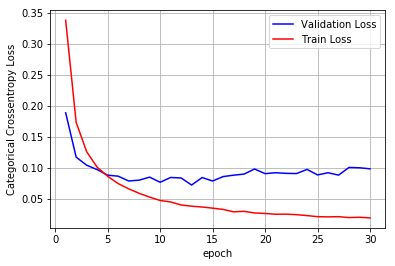

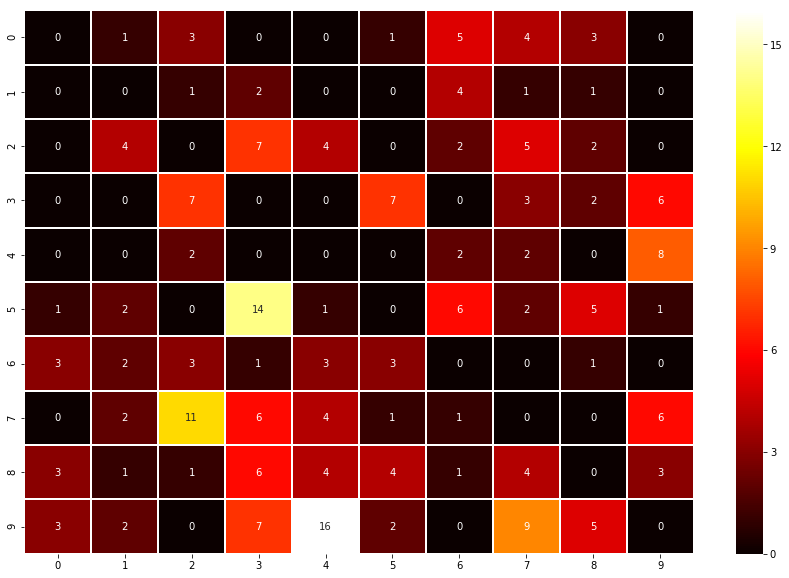

In [52]:
start_time = time.time()

history[0] = model_A.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[0] = model_A.predict(X_test)
results2 = np.argmax(results[0],axis = 1)
score = model_A.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[0].history['val_loss']
ty = history[0].history['loss']
plt_dynamic(x, vy, ty, ax)


confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.08778617531061172
Test accuracy: 0.9739000201225281


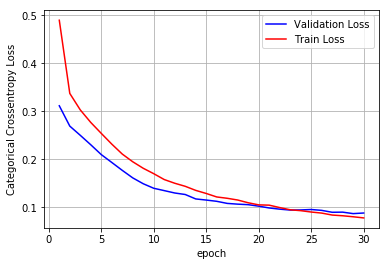

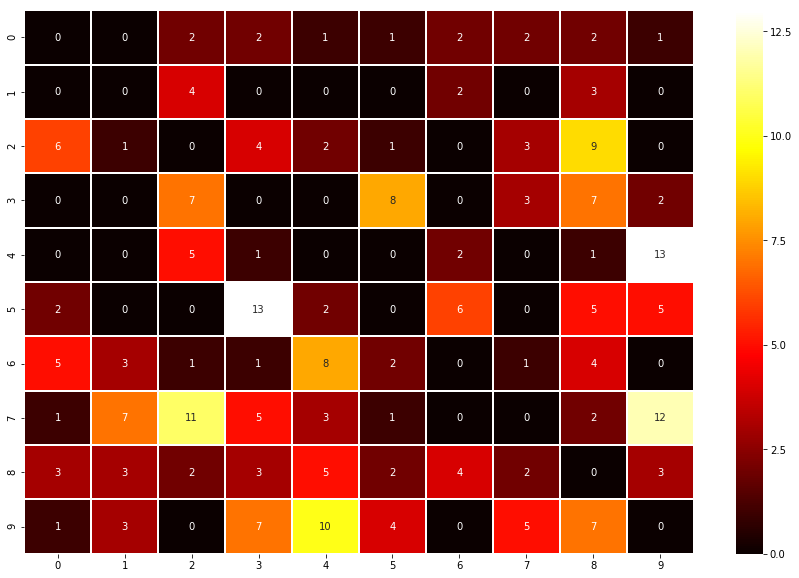

In [53]:
history[1] = model_B.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[1] = model_B.predict(X_test)
results2 = np.argmax(results[1],axis = 1)
score = model_B.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[1].history['val_loss']
ty = history[1].history['loss']
plt_dynamic(x, vy, ty, ax)

confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.08383668959140778
Test accuracy: 0.9785000085830688


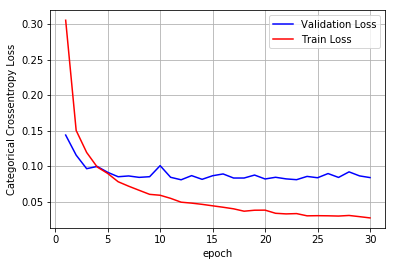

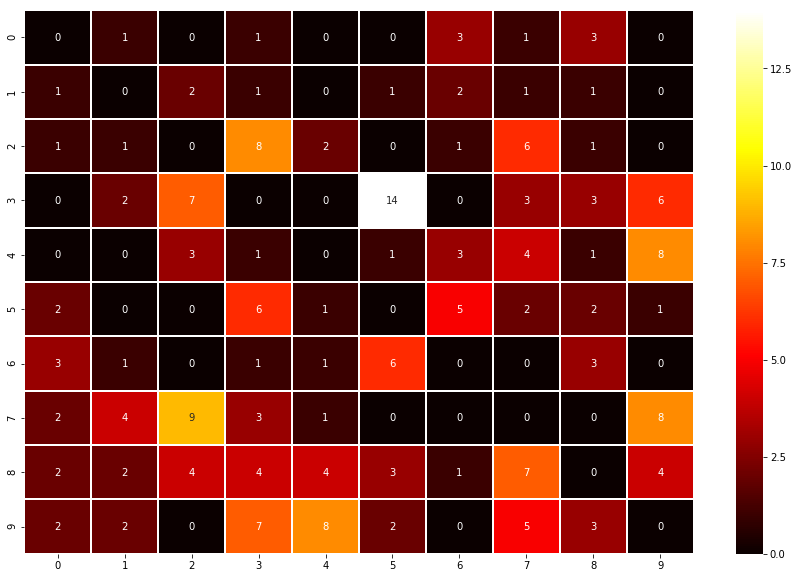

In [54]:
history[2] = model_C.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[2] = model_C.predict(X_test)
results2 = np.argmax(results[2],axis = 1)
score = model_C.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[2].history['val_loss']
ty = history[2].history['loss']
plt_dynamic(x, vy, ty, ax)

confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.09104026108980179
Test accuracy: 0.9757000207901001


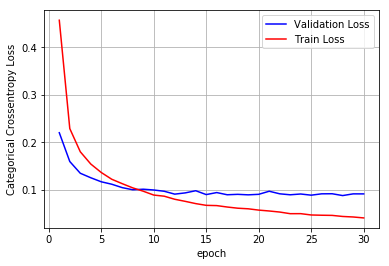

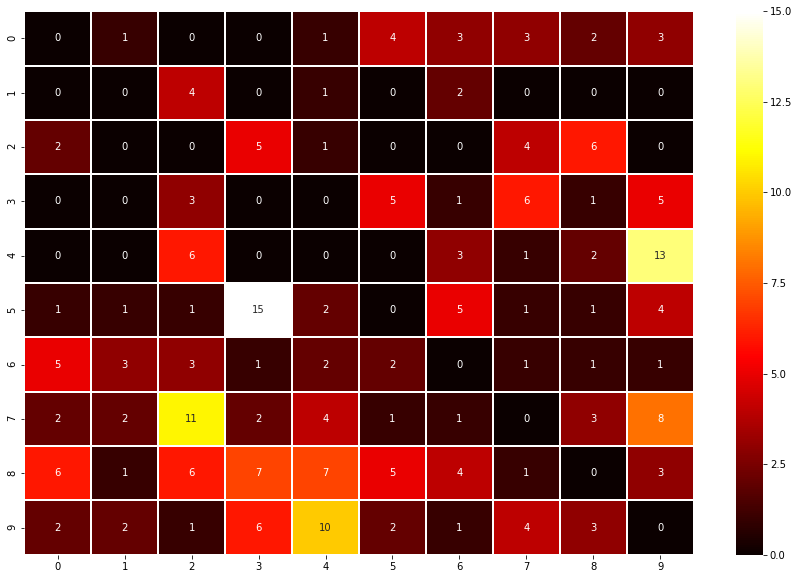

In [55]:
history[3] = model_D.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[3] = model_D.predict(X_test)
results2 = np.argmax(results[3],axis = 1)
score = model_D.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[3].history['val_loss']
ty = history[3].history['loss']
plt_dynamic(x, vy, ty, ax)

confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.1565994769334793
Test accuracy: 0.9553999900817871


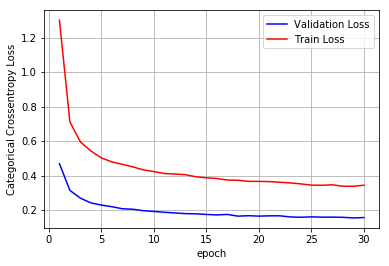

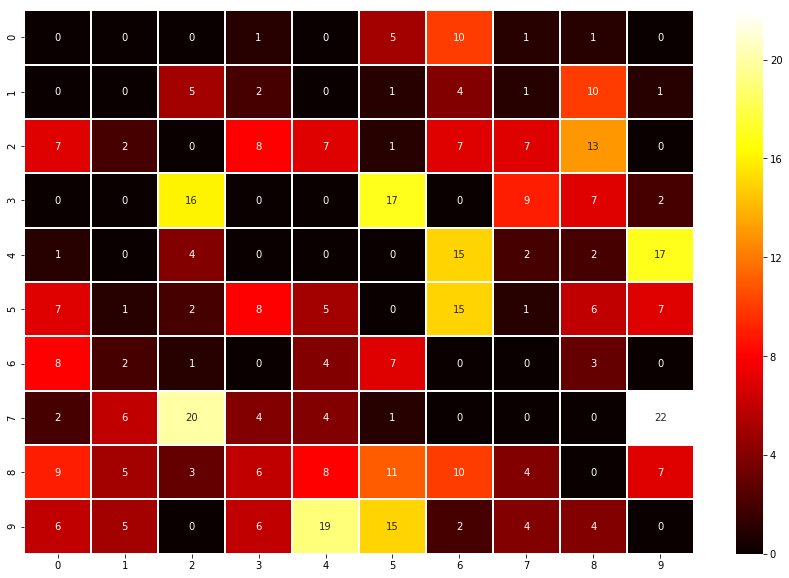

In [56]:
history[4] = model_E.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[4] = model_E.predict(X_test)
results2 = np.argmax(results[4],axis = 1)
score = model_E.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[4].history['val_loss']
ty = history[4].history['loss']
plt_dynamic(x, vy, ty, ax)

confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.4326174855232239
Test accuracy: 0.886900007724762


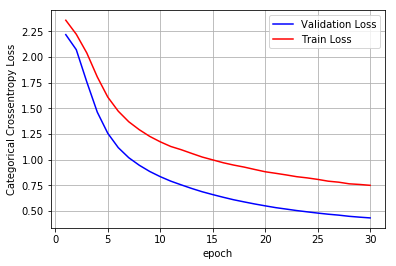

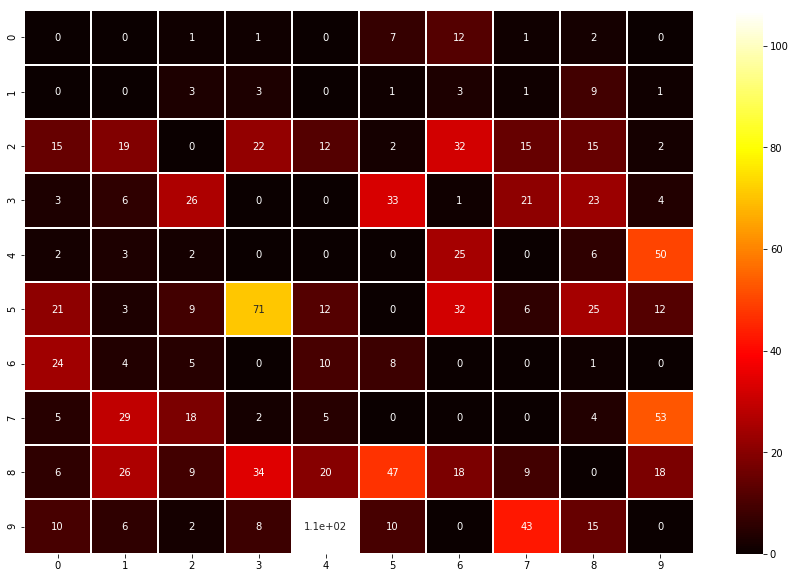

In [57]:
start_time = time.time()

history[5] = model_F.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[5] = model_F.predict(X_test)
results2 = np.argmax(results[5],axis = 1)
score = model_F.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[5].history['val_loss']
ty = history[5].history['loss']
plt_dynamic(x, vy, ty, ax)


confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.16069284081459045
Test accuracy: 0.9605000019073486


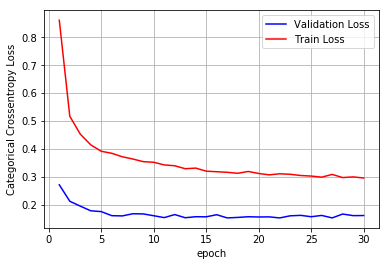

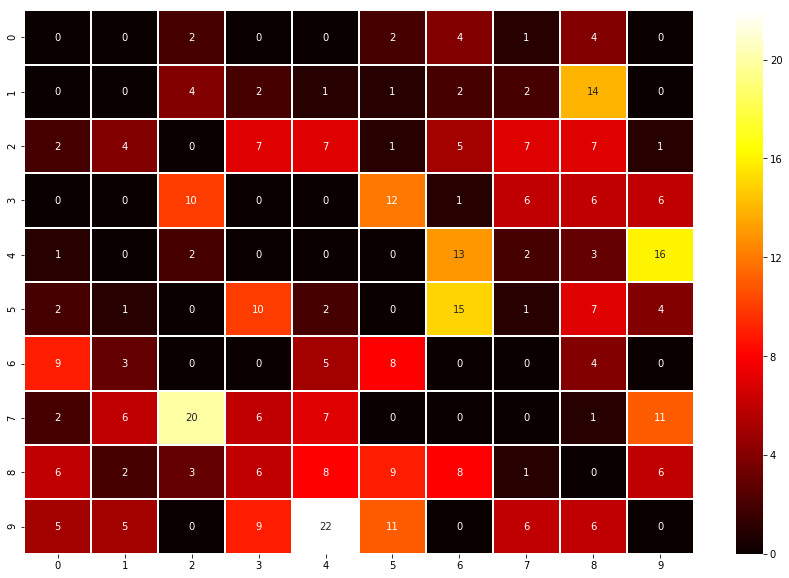

In [58]:
start_time = time.time()

history[6] = model_G.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[6] = model_G.predict(X_test)
results2 = np.argmax(results[6],axis = 1)
score = model_G.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[6].history['val_loss']
ty = history[6].history['loss']
plt_dynamic(x, vy, ty, ax)


confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.15956415235996246
Test accuracy: 0.9569000005722046


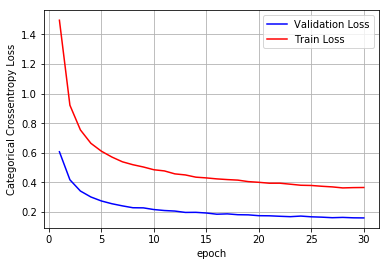

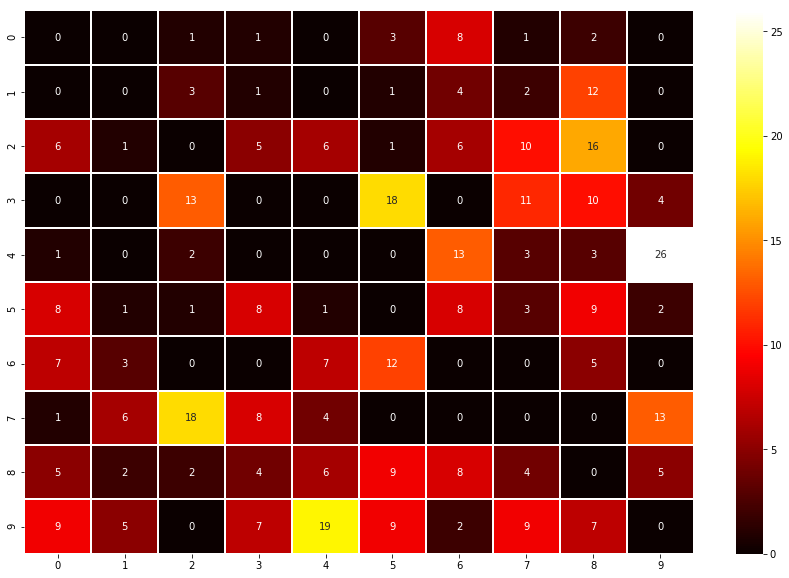

In [59]:
start_time = time.time()

history[7] = model_H.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[7] = model_H.predict(X_test)
results2 = np.argmax(results[7],axis = 1)
score = model_H.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[7].history['val_loss']
ty = history[7].history['loss']
plt_dynamic(x, vy, ty, ax)


confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.11777511239051819
Test accuracy: 0.9664000272750854


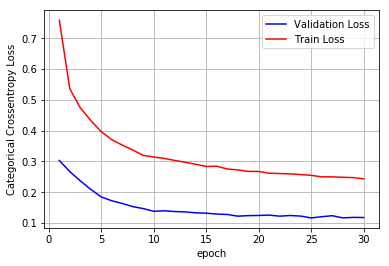

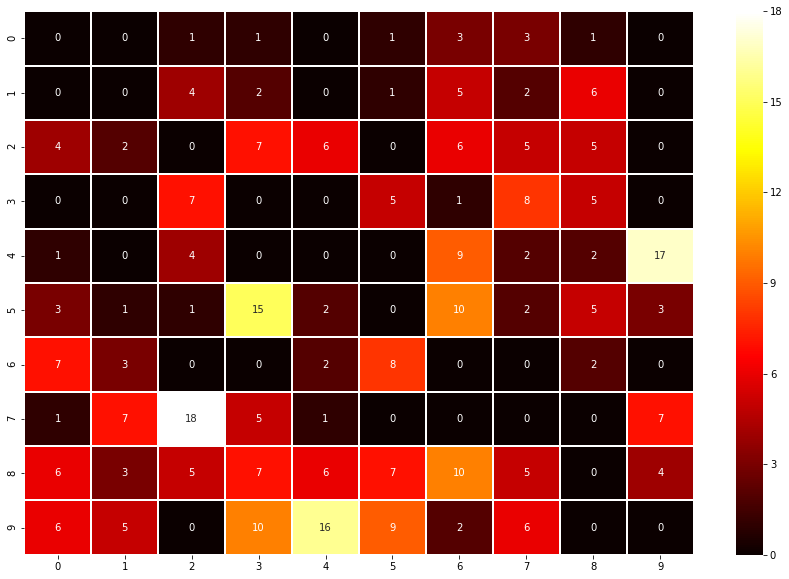

In [60]:
start_time = time.time()

history[8] = model_I.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[8] = model_I.predict(X_test)
results2 = np.argmax(results[8],axis = 1)
score = model_I.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[8].history['val_loss']
ty = history[8].history['loss']
plt_dynamic(x, vy, ty, ax)


confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.24504601955413818
Test accuracy: 0.925599992275238


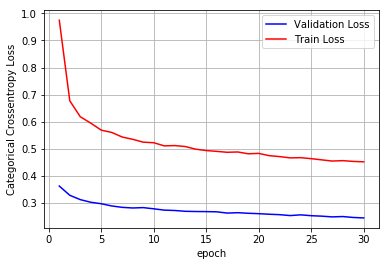

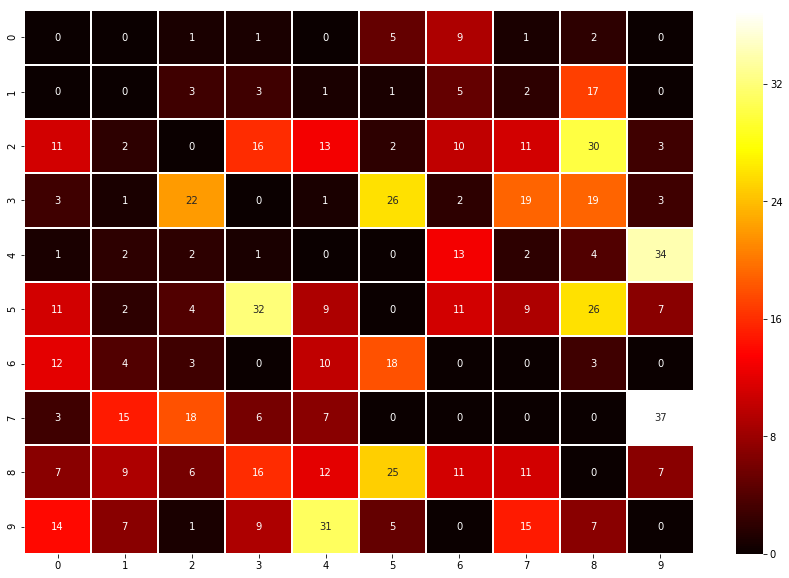

In [61]:
start_time = time.time()

history[9] = model_J.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[9] = model_J.predict(X_test)
results2 = np.argmax(results[9],axis = 1)
score = model_J.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[9].history['val_loss']
ty = history[9].history['loss']
plt_dynamic(x, vy, ty, ax)


confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.12272118777036667
Test accuracy: 0.9660999774932861


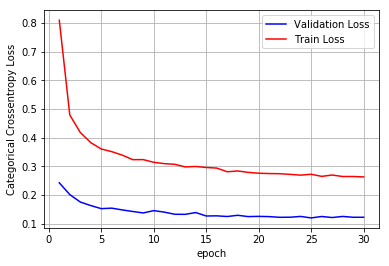

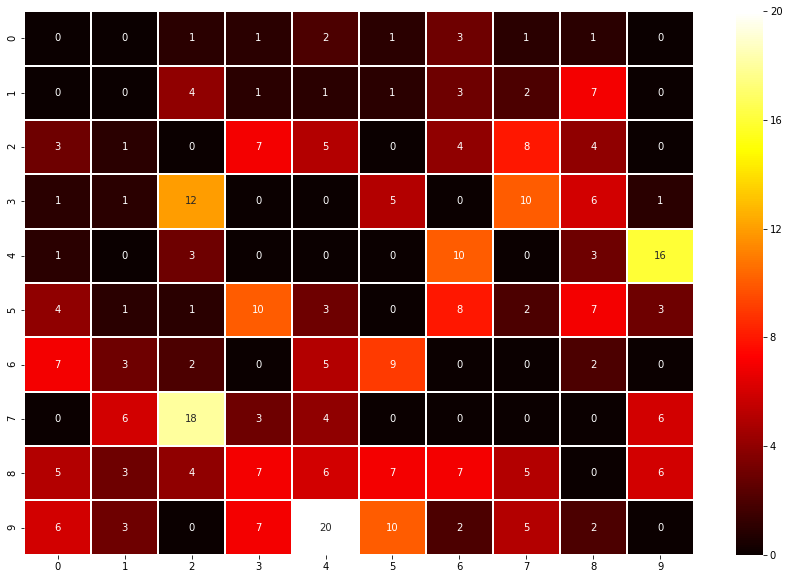

In [62]:
start_time = time.time()

history[10] = model_K.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[10] = model_K.predict(X_test)
results2 = np.argmax(results[10],axis = 1)
score = model_K.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[10].history['val_loss']
ty = history[10].history['loss']
plt_dynamic(x, vy, ty, ax)


confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.11759952455759048
Test accuracy: 0.965499997138977


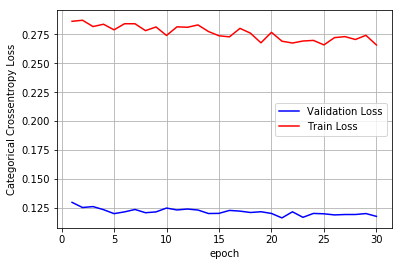

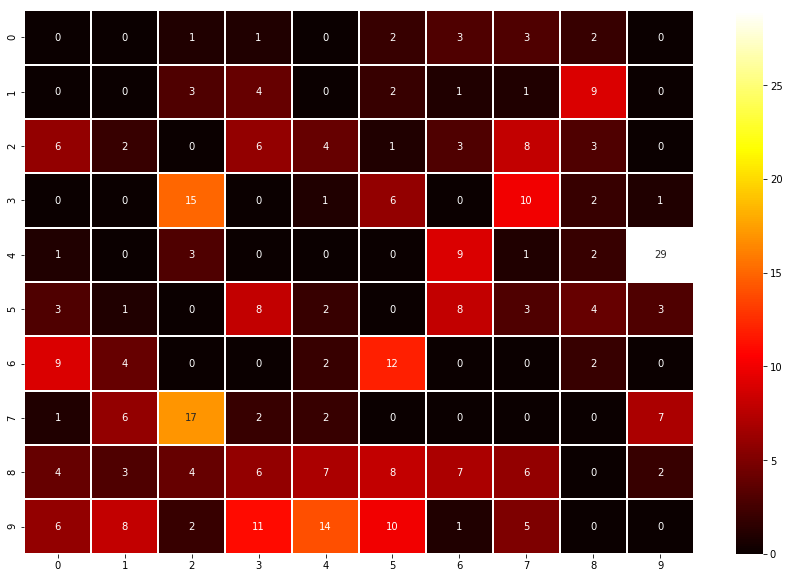

In [65]:
start_time = time.time()

history[11] = model_L.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[11] = model_L.predict(X_test)
results2 = np.argmax(results[11],axis = 1)
score = model_L.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[11].history['val_loss']
ty = history[11].history['loss']
plt_dynamic(x, vy, ty, ax)


confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.1276535987854004
Test accuracy: 0.9710999727249146


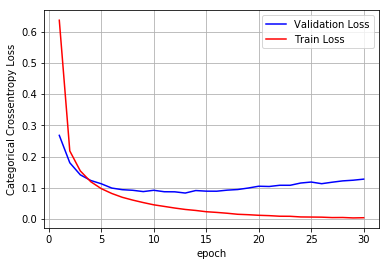

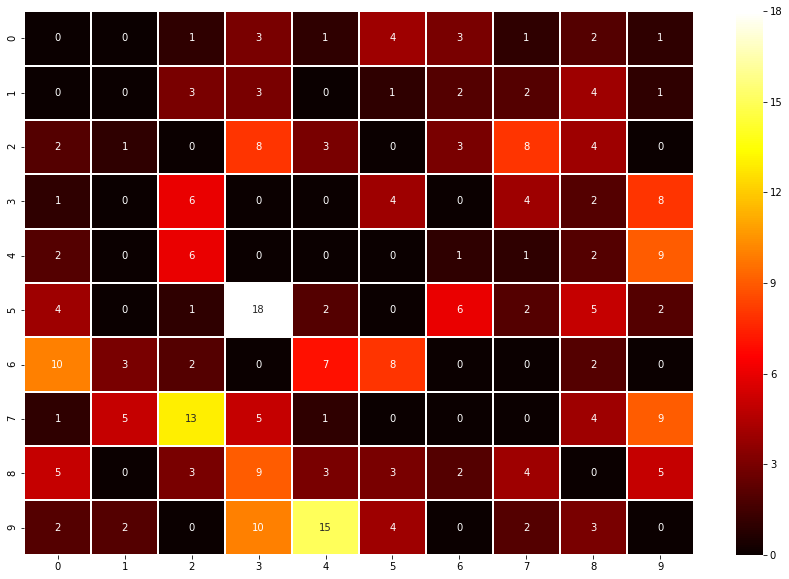

In [66]:
start_time = time.time()

history[12] = model_M.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[12] = model_M.predict(X_test)
results2 = np.argmax(results[12],axis = 1)
score = model_M.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[12].history['val_loss']
ty = history[12].history['loss']
plt_dynamic(x, vy, ty, ax)


confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.23416779935359955
Test accuracy: 0.932699978351593


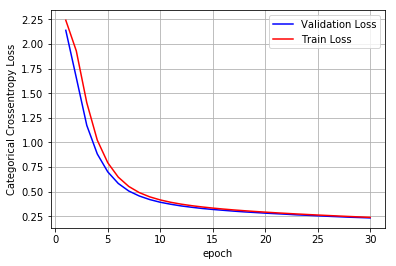

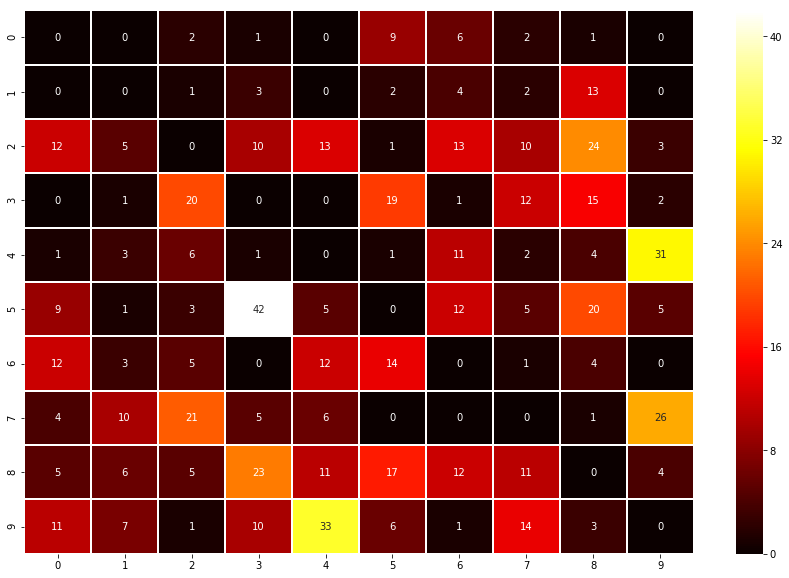

In [67]:
start_time = time.time()

history[13] = model_N.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[13] = model_N.predict(X_test)
results2 = np.argmax(results[13],axis = 1)
score = model_N.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[13].history['val_loss']
ty = history[13].history['loss']
plt_dynamic(x, vy, ty, ax)


confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.18851269781589508
Test accuracy: 0.9700999855995178


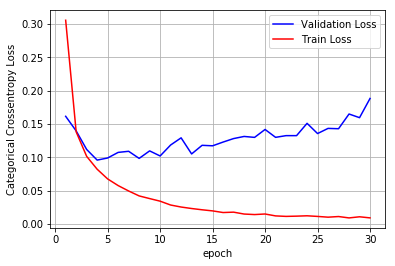

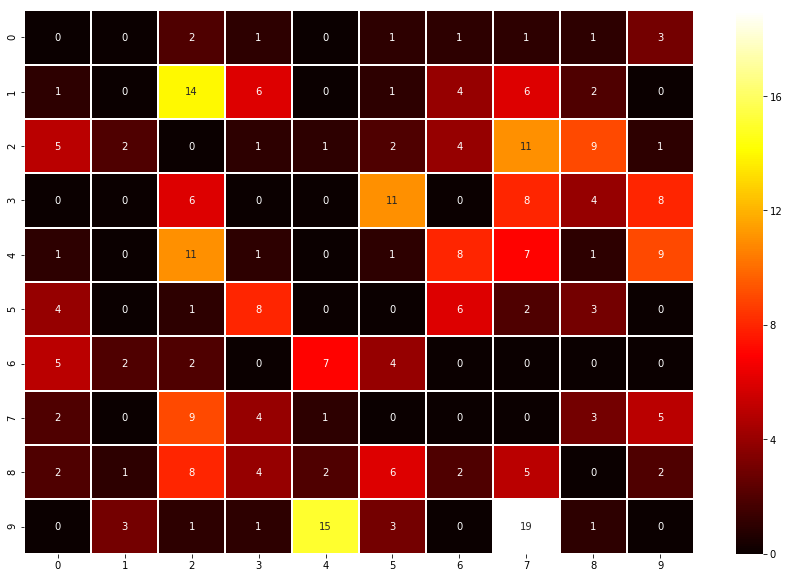

In [68]:
start_time = time.time()

history[14] = model_O.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[14] = model_O.predict(X_test)
results2 = np.argmax(results[14],axis = 1)
score = model_O.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[14].history['val_loss']
ty = history[14].history['loss']
plt_dynamic(x, vy, ty, ax)


confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.08730549365282059
Test accuracy: 0.9736999869346619


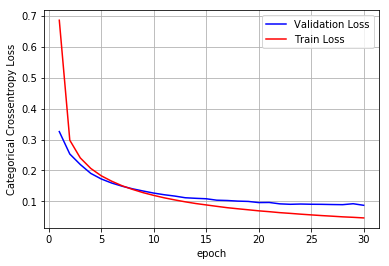

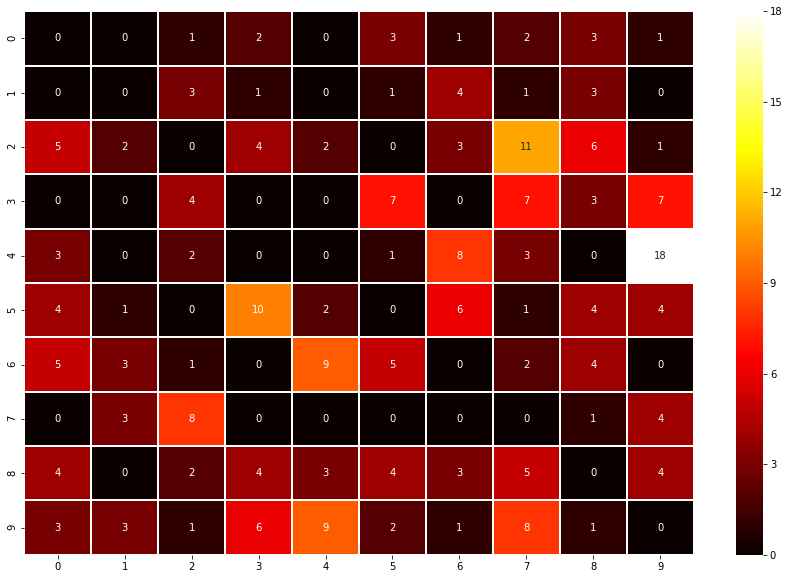

In [69]:
start_time = time.time()

history[15] = model_P.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[15] = model_P.predict(X_test)
results2 = np.argmax(results[15],axis = 1)
score = model_P.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[15].history['val_loss']
ty = history[15].history['loss']
plt_dynamic(x, vy, ty, ax)


confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.1331159770488739
Test accuracy: 0.9710000157356262


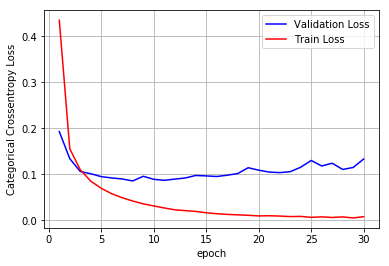

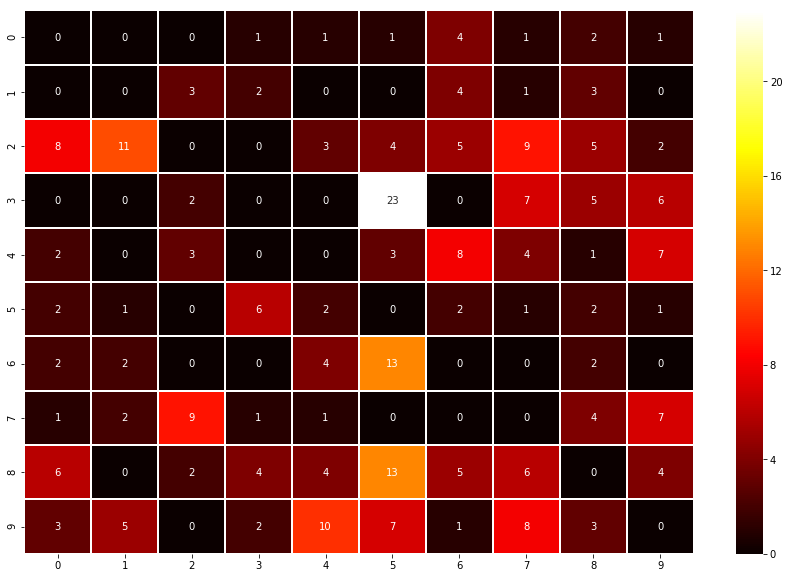

In [70]:
start_time = time.time()

history[16] = model_Q.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[16] = model_Q.predict(X_test)
results2 = np.argmax(results[16],axis = 1)
score = model_Q.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[16].history['val_loss']
ty = history[16].history['loss']
plt_dynamic(x, vy, ty, ax)


confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

## Ensemble of previous models

In [71]:
# Predict numbers from with ensemble

results2 = np.zeros( (X_test.shape[0],10) )
for j in range(models_num):
    results2 = results2 + results[j]
results2 = np.argmax(results2,axis = 1)
 
# Calculate Accuracy

c=0
for i in range(10000):
    index_of_y = np.where(Y_test[i] == 1)
    if results2[i]!=int(index_of_y[0]):
        c +=1
print("Ensemble Accuracy = %f" % (1-c/10000.))

Ensemble Accuracy = 0.977200


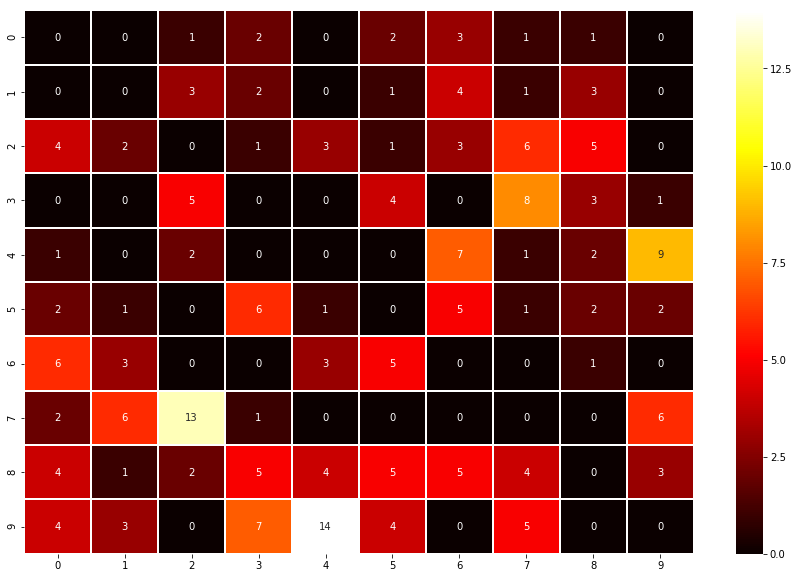

In [73]:
# Confusion map from ensemble

true_results = np.zeros(X_test.shape[0])

for i in range(10000):
    index_of_y_test = np.where(Y_test[i] == 1)
    true_results[i] = int(index_of_y_test[0])
    
    
confusion_ensemble = confusion_matrix(true_results, results2)

plot_confusion(confusion_ensemble)